In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
#with open("../ressources/automode_descriptions_evaluated.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed21_n600.pickle", "rb") as file:
#with open("../ressources/automode_evaluated_seed15_n600.pickle", "rb") as file:
with open("../ressources/llm_evaluated_concat_s14n600_s15n600_train_2024-12-12_16.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


/tmp/ipykernel_77984/3181682175.py:3: RuntimeWarning: invalid value encountered in divide
  original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)


In [5]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=299 new_size=280: ratio: 0.9364548494983278
 Connection:  old_size=295 new_size=265: ratio: 0.8983050847457628
 Distribution:  old_size=316 new_size=286: ratio: 0.9050632911392406
 Foraging:  old_size=290 new_size=265: ratio: 0.9137931034482759


In [6]:
group_dfs["Aggregation"]

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,llm_scores,llm_behavior_tree,llm_avg_score,type,original_index,z-scores,coeff_of_var
0,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.269231, 0.192308, 0.230769, 0.269231, 0.307...",0.230769,"[0.269231, 0.346154, 0.230769, 0.153846, 0.230...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.230769,Aggregation,0,"[0.6201762776709412, -0.6201698278647428, -4.8...",0.044790
1,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.375, 0.375, 0.3125, 0.4375, 0.375, 0.3125, ...",0.356250,"[0.4375, 0.3125, 0.3125, 0.5, 0.25, 0.3125, 0....",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.356250,Aggregation,3,"[0.4685212856658179, 0.4685212856658179, -1.09...",0.023982
3,"With a length of 2.17 meters, width of 6.48 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.5, 0.5, 0.433333, 0.5, 0.5, 0.5, 0.5, 0.5, ...",0.493333,"[0.4, 0.4, 0.366667, 0.4, 0.4, 0.4, 0.333333, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.373333,Aggregation,41,"[0.333333333333332, 0.333333333333332, -3.0000...",0.010381
12,"The circular arena, having a radius of 2.83 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.318182, 0.295455, 0.272727, 0.363636, 0.363...",0.340909,"[0.386364, 0.295455, 0.363636, 0.318182, 0.386...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.313636,Aggregation,60,"[-0.512986087292829, -1.0259699174297208, -1.5...",0.027456
13,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.236842, 0.368421, 0.263158, 0.368421, 0.263...",0.307895,"[0.105263, 0.131579, 0.157895, 0.210526, 0.131...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.173684,Aggregation,66,"[-1.5069991897198087, 1.2837345517251821, -0.9...",0.030522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,The arena has a radius of 4.67 m. 0 lights are...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.1, 0.0, 0.1, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, ...",0.110000,"[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.020000,Aggregation,1178,"[-0.18569533817705206, -2.042648719947571, -0....",0.048515
295,"A rectangular area, with a length of 5.08 mete...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.0666667, 0.133333, 0.166667, 0.2, 0.133333,...",0.120000,"[0.0666667, 0.0, 0.0, 0.0333333, 0.0666667, 0....",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.026667,Aggregation,1184,"[-1.069042963180204, 0.26725497797848446, 0.93...",0.043256
296,A circle with 11 walls forms the structure of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3

In [7]:
try:
    print(group_dfs["Foraging"][group_dfs["Foraging"]["avg_score"] > 4000].iloc[0].behavior_tree)
except:
    print("not found")

--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --n00 6 --c00 3 --p00 1 --w00 15.7095 --n01 5 --a01 1 --p01 0 --n1 0 --nchild1 2 --n10 6 --c10 0 --p10 0.9842 --n11 5 --a11 2 --p11 0 --n2 0 --nchild2 2 --n20 6 --c20 1 --p20 0.4328 --n21 5 --a21 1 --p21 0 --n3 0 --nchild3 2 --n30 6 --c30 0 --p30 0.5317 --n31 5 --a31 4 --att31 4.746 --p31 0


## Distribution of Scores

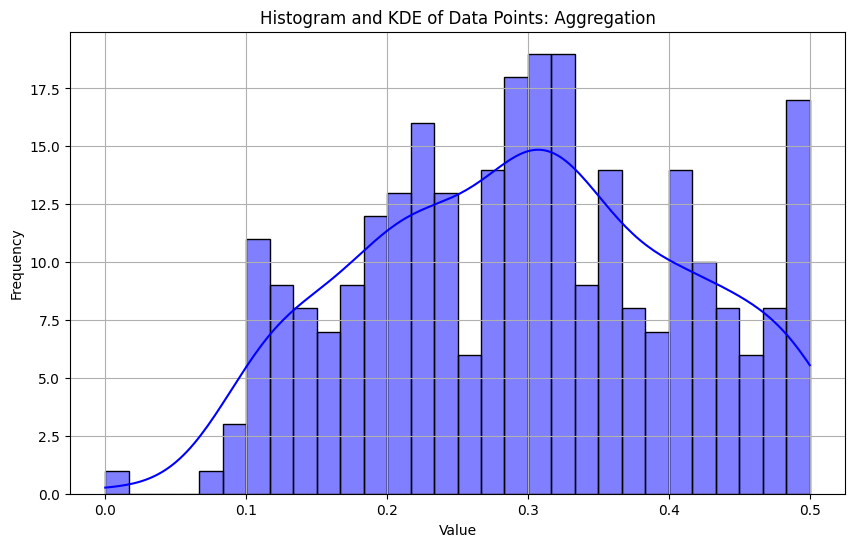

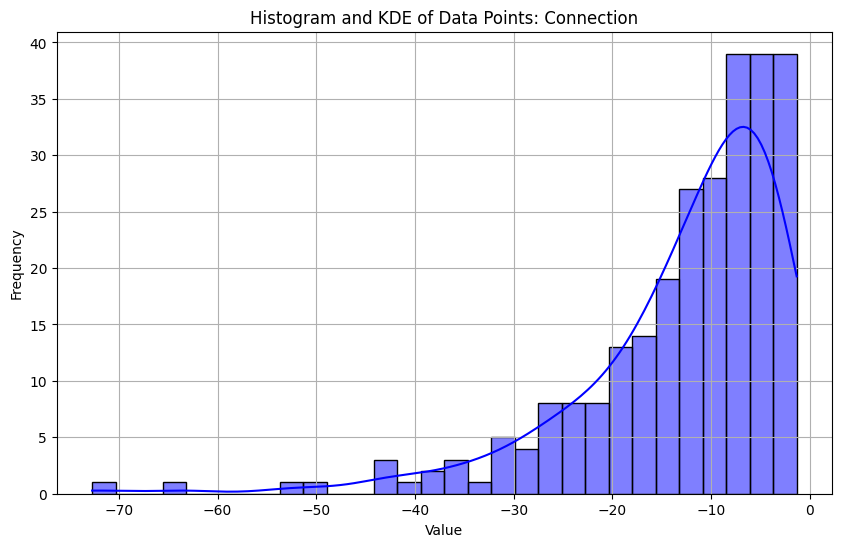

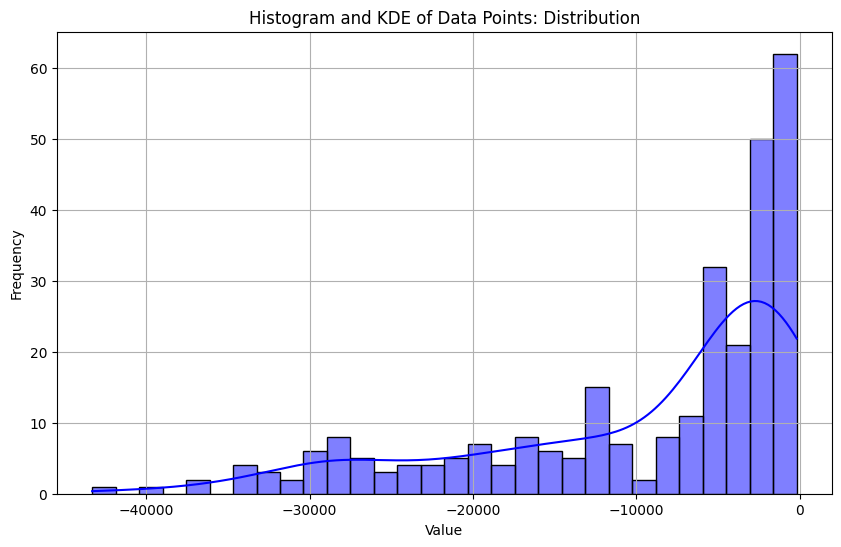

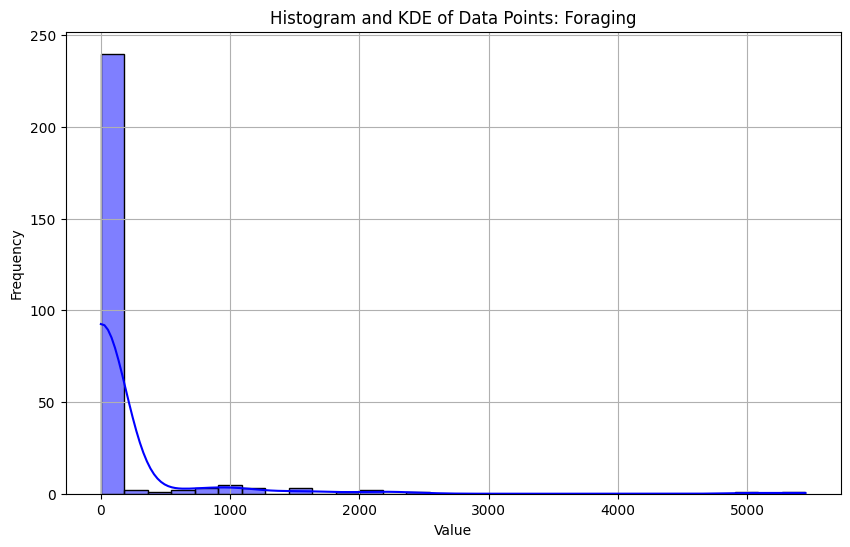

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for group, df in group_dfs.items():
    # Sample data
    data = df.avg_score.to_numpy()

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"Histogram and KDE of Data Points: {group}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [9]:
import plotly.express as px
import numpy as np

# Sample data
data = group_dfs["Aggregation"].avg_score.to_numpy()

# Create a KDE plot
# fig = px.density_contour(x=data, title='KDE Plot of Data Points', labels={'x': 'Value'})
# fig.update_layout(xaxis_title='Value', yaxis_title='Density')
# fig.show()

# Create a histogram
fig = px.histogram(data, nbins=30, title='Histogram of Data Points', labels={'value': 'Value'})
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')
fig.show()


## Coefficient of Variation Analysis

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



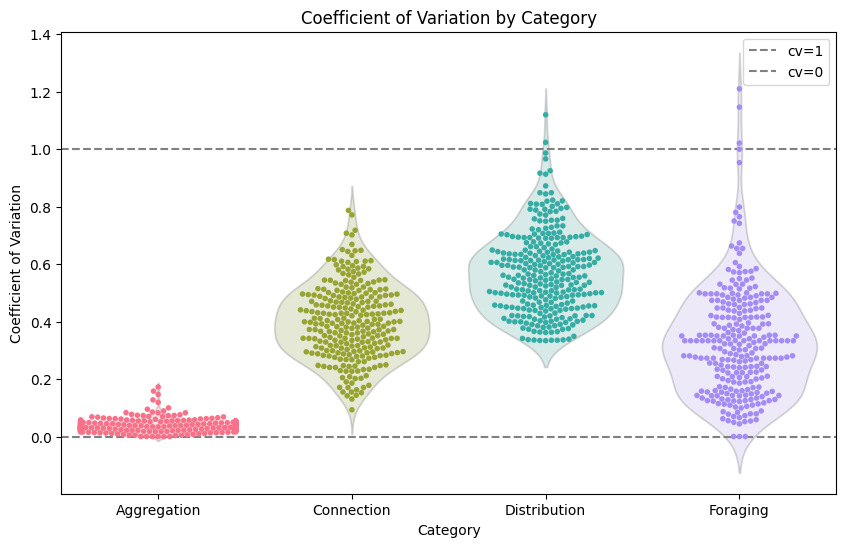

In [10]:
combined_df = pd.concat(
    [df.assign(category=category) for category, df in group_dfs.items()],
    ignore_index=True
)

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df, x='category', y='coeff_of_var', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df, x='category', y='coeff_of_var', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=0')

# Step 4: Customize the plot
plt.title('Coefficient of Variation by Category')
plt.xlabel('Category')
plt.ylabel('Coefficient of Variation')
plt.legend()  # Show legend for the horizontal line
plt.show()

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



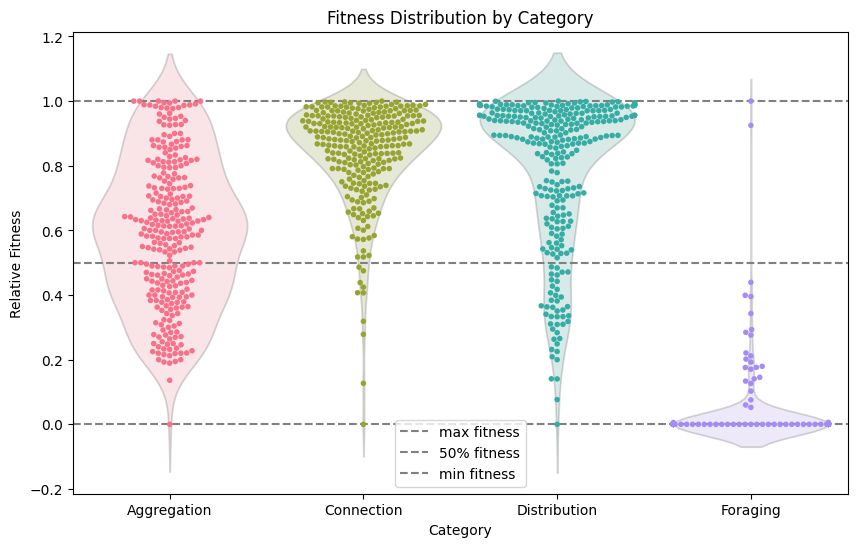

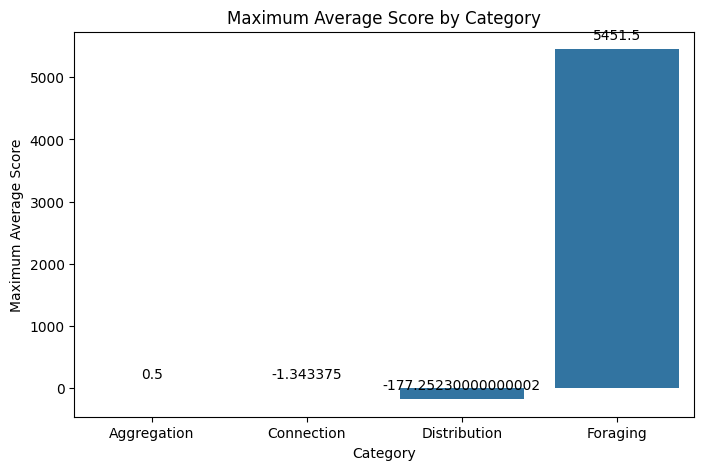

In [11]:
# Step 1: Calculate the max and min avg_score for each category
min_max_values = combined_df.groupby("category")["avg_score"].agg(['min', 'max']).reset_index()

# Step 2: Merge the min and max values back to the original DataFrame
combined_df_scaled = combined_df.merge(min_max_values, on="category")

# Step 3: Scale the avg_score to the range [0, 1]
combined_df_scaled['scaled_avg_score'] = (combined_df_scaled['avg_score'] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

# Step 4: Customize the plot
plt.title('Fitness Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Relative Fitness')
plt.legend()  # Show legend for the horizontal line
plt.show()

# Step 1: Calculate the maximum avg_score for each category
max_values = combined_df_scaled.groupby("category")["avg_score"].max().reset_index()
max_values.rename(columns={"avg_score": "max_avg_score"}, inplace=True)

# Step 2: Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

# Adding titles and labels
plt.title('Maximum Average Score by Category')
plt.xlabel('Category')
plt.ylabel('Maximum Average Score')

# Step 3: Annotate the bars with their respective values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset text
                      textcoords='offset points')

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/julian/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



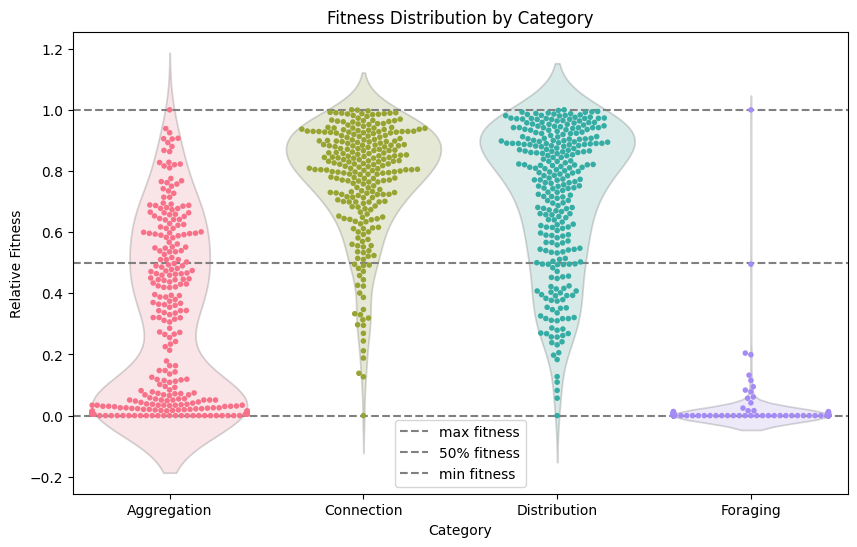

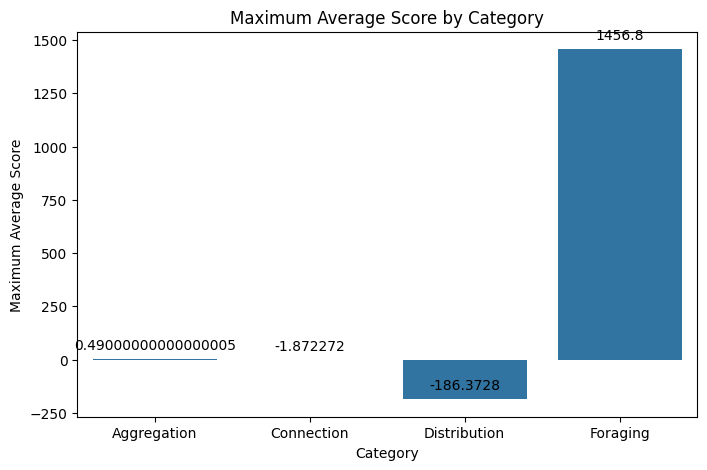

In [12]:
if "llm_avg_score" in combined_df.keys():
    scoreidx = "llm_avg_score"
    # Step 1: Calculate the max and min avg_score for each category
    min_max_values = combined_df.groupby("category")[scoreidx].agg(['min', 'max']).reset_index()

    # Step 2: Merge the min and max values back to the original DataFrame
    combined_df_scaled = combined_df.merge(min_max_values, on="category")

    # Step 3: Scale the avg_score to the range [0, 1]
    combined_df_scaled['scaled_avg_score'] = (combined_df_scaled[scoreidx] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

    plt.figure(figsize=(10, 6))

    # Define a color palette for the categories
    palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

    # Use violinplot to show the distribution of the data with colors
    sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

    # Overlay swarm plot to scatter individual points with colors
    sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

    # Add a horizontal line at y=1 (solid and black)
    plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
    plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
    plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

    # Step 4: Customize the plot
    plt.title('Fitness Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Relative Fitness')
    plt.legend()  # Show legend for the horizontal line
    plt.show()

    # Step 1: Calculate the maximum avg_score for each category
    max_values = combined_df_scaled.groupby("category")[scoreidx].max().reset_index()
    max_values.rename(columns={scoreidx: "max_avg_score"}, inplace=True)

    # Step 2: Create a bar plot using Seaborn
    plt.figure(figsize=(8, 5))
    bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

    # Adding titles and labels
    plt.title('Maximum Average Score by Category')
    plt.xlabel('Category')
    plt.ylabel('Maximum Average Score')

    # Step 3: Annotate the bars with their respective values
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5),  # Offset text
                        textcoords='offset points')

In [13]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="avg_score", ascending=False)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.avg_score:07.2f}")

Aggregation 	 0821 0000.50
Aggregation 	 0608 0000.50
Aggregation 	 0489 0000.50
Aggregation 	 0342 0000.50
Aggregation 	 0129 0000.50
Aggregation 	 0154 0000.50
Aggregation 	 0871 0000.50
Aggregation 	 0270 0000.50
Aggregation 	 0585 0000.49
Aggregation 	 0996 0000.49
Aggregation 	 0418 0000.49
Aggregation 	 0041 0000.49
Aggregation 	 0850 0000.49
Aggregation 	 0913 0000.49
Aggregation 	 0182 0000.49
Aggregation 	 0981 0000.49
Aggregation 	 0316 0000.49
Aggregation 	 0738 0000.48
Aggregation 	 0201 0000.48
Aggregation 	 0317 0000.48
Aggregation 	 0155 0000.48
Aggregation 	 1097 0000.47
Aggregation 	 0709 0000.47
Aggregation 	 0789 0000.47
Aggregation 	 0132 0000.47
Connection 	 1152 -001.34
Connection 	 0384 -001.51
Connection 	 0365 -001.54
Connection 	 0549 -001.58
Connection 	 0443 -001.62
Connection 	 0795 -001.64
Connection 	 0626 -001.70
Connection 	 0558 -001.74
Connection 	 0660 -001.80
Connection 	 0109 -001.81
Connection 	 0865 -002.06
Connection 	 0233 -002.08
Connection 	 

In [14]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="llm_avg_score", ascending=True)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.llm_avg_score:07.2f}")

Aggregation 	 0220 0000.00
Aggregation 	 1036 0000.00
Aggregation 	 1049 0000.00
Aggregation 	 1094 0000.00
Aggregation 	 1073 0000.00
Aggregation 	 1052 0000.00
Aggregation 	 1045 0000.00
Aggregation 	 1025 0000.00
Aggregation 	 0240 0000.00
Aggregation 	 0306 0000.00
Aggregation 	 0887 0000.00
Aggregation 	 0718 0000.00
Aggregation 	 0416 0000.00
Aggregation 	 0855 0000.00
Aggregation 	 0429 0000.00
Aggregation 	 0646 0000.00
Aggregation 	 0576 0000.00
Aggregation 	 0583 0000.00
Aggregation 	 0494 0000.00
Aggregation 	 0553 0000.00
Aggregation 	 0461 0000.00
Aggregation 	 1163 0000.00
Aggregation 	 0152 0000.00
Aggregation 	 0147 0000.00
Aggregation 	 0444 0000.00
Connection 	 0999 -078.35
Connection 	 0826 -068.65
Connection 	 0341 -067.76
Connection 	 0910 -063.95
Connection 	 0172 -062.13
Connection 	 0268 -059.68
Connection 	 0040 -057.77
Connection 	 0995 -055.77
Connection 	 0632 -055.63
Connection 	 0435 -054.38
Connection 	 0716 -053.95
Connection 	 0273 -053.12
Connection 	 